**NGUYỄN HỮU THUẬN 19146400_CAMXUC**



In [44]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
train = ImageDataGenerator(featurewise_center=True,
                                    rotation_range=0.4,
                                    width_shift_range=0.1,
                                    zoom_range=0.01,
                                    shear_range=0.01,
                                    rescale=1./255,
                                    horizontal_flip= True)
validation=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CAMXUC/Train/Train',target_size=(150,150),
                                        batch_size=10, class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CAMXUC/Train/VAL',target_size=(150,150),
                                         batch_size=10,class_mode='categorical')

Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [74]:
train_dataset.class_indices

{'buon': 0, 'giandu': 1, 'hanhphuc': 2, 'ngacnhien': 3, 'sohai': 4}

In [75]:
#tạo model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 43808)             0         
                                                                 
 dense_33 (Dense)            (None, 512)             

In [77]:
#tao modle
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])

#train 
history = model.fit(train_dataset,epochs=50,validation_data=validation_dataset, verbose=1)      

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5/5 [==============================] - 2s 270ms/step - loss: 16.0444 - accuracy: 0.5600 - val_loss: 12.6270 - val_accuracy: 0.2600
Epoch 2/50
5/5 [==============================] - 1s 208ms/step - loss: 2.2971 - accuracy: 0.7200 - val_loss: 9.3111 - val_accuracy: 0.4000
Epoch 3/50
5/5 [==============================] - 1s 202ms/step - loss: 1.0718 - accuracy: 0.9000 - val_loss: 6.3214 - val_accuracy: 0.4800
Epoch 4/50
5/5 [==============================] - 1s 199ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 6.8728 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 1s 199ms/step - loss: 0.1652 - accuracy: 0.9800 - val_loss: 7.5960 - val_accuracy: 0.4200
Epoch 6/50
5/5 [==============================] - 1s 201ms/step - loss: 0.4467 - accuracy: 0.9400 - val_loss: 7.5784 - val_accuracy: 0.4200
Epoch 7/50
5/5 [==============================] - 1s 202ms/step - loss: 0.0529 - accuracy: 0.9800 - val_loss: 8.3104 - val_accuracy: 0.3600
Epoch 8/50
5/5 [=============

In [78]:
model.save('CNNCAMXUC_Recognition.h5')

Sai số kiểm tra là:  8.105636596679688
Độ chính xác kiểm tra là:  0.4000000059604645


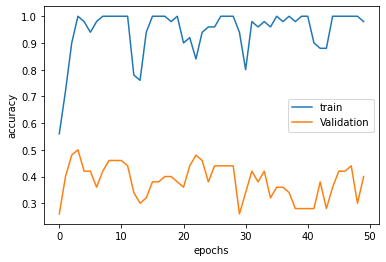

In [79]:
# ve do thi
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/CNNTIEN_Recognition.h5')
model.summary()

In [80]:
classes = validation_dataset.class_indices

classes = list(classes.keys())

classes

['buon', 'giandu', 'hanhphuc', 'ngacnhien', 'sohai']

cảm xúc [2]


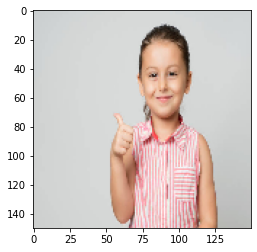

In [81]:
img_path = '/content/drive/MyDrive/Colab Notebooks/CAMXUC/Test/hanhphuc.jpg'

img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

camxuc=np.argmax(model.predict(img),axis=1)
pred = model.predict(img)
print("cảm xúc",+camxuc)


cảm xúc [4]


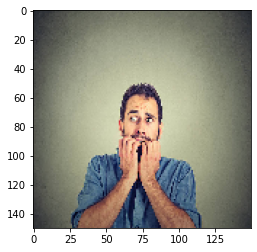

In [84]:
img_path = '/content/drive/MyDrive/Colab Notebooks/CAMXUC/Test/sohai3.jpg'

img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

camxuc=np.argmax(model.predict(img),axis=1)
pred = model.predict(img)
print("cảm xúc",+camxuc)


[DATA ALBUM ](link:https://drive.google.com/drive/folders/1R0_3u4mU4m7TS1Knh-EY7EMbR7Eve62M?usp=sharing)